In [7]:
import pandas as pd

IUCNHeirarchyAndExtinction = pd.read_csv("/Users/eschuler/Downloads/IUCNHeirarchyAndExtinction.csv", encoding='ISO-8859-1')
IUCNHeirarchyAndExtinction.info()

IUCNSpeciesCountryOccurences = pd.read_csv("/Users/eschuler/Downloads/IUCNSpeciesCountryOccurences.csv", encoding='ISO-8859-1')
IUCNSpeciesCountryOccurences.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   taxonid                187 non-null    int64  
 1   assessmentid           187 non-null    int64  
 2   kingdom                187 non-null    object 
 3   phylum                 187 non-null    object 
 4   class                  187 non-null    object 
 5   order                  187 non-null    object 
 6   family                 187 non-null    object 
 7   genus                  187 non-null    object 
 8   species                187 non-null    object 
 9   infrarank              0 non-null      float64
 10  infratype              0 non-null      float64
 11  subpopulation          0 non-null      float64
 12  friendly_name          187 non-null    object 
 13  taxonomic_authority    187 non-null    object 
 14  category               187 non-null    object 
 15  criter

In [50]:
IUCNHeirarchyAndExtinction.head()

taxonid  assessmentid   kingdom    phylum     class            order  \
0    17026       1306343  ANIMALIA  CHORDATA  MAMMALIA        CARNIVORA   
1    22103       9356917  ANIMALIA  CHORDATA  MAMMALIA          SIRENIA   
2    10303      43792683  ANIMALIA  CHORDATA  MAMMALIA          SIRENIA   
3    22102      43793736  ANIMALIA  CHORDATA  MAMMALIA          SIRENIA   
4     4162      44199757  ANIMALIA  CHORDATA  MAMMALIA  CETARTIODACTYLA   

         family            genus   species  infrarank  ...  category  \
0     OTARIIDAE       Phocarctos   hookeri        NaN  ...        EN   
1  TRICHECHIDAE       Trichechus   manatus        NaN  ...        VU   
2    DUGONGIDAE     Hydrodamalis     gigas        NaN  ...        EX   
3  TRICHECHIDAE       Trichechus  inunguis        NaN  ...        VU   
4   DELPHINIDAE  Cephalorhynchus   hectori        NaN  ...        EN   

   criteria possibly_extinct possibly_extinct_wild assessmentdate  \
0      A4bd            False                 False      18-Nov-14   
1        C1            False                 False      30-Jun-08   
2       NaN            False                 False       4-Apr-16   
3      A3cd            False                 False      28-Feb-16   
4       A4d            False                 False       1-Jul-08   

                                           assessors  \
0                                     Chilvers, B.L.   
1  Deutsch, C.J., Self-Sullivan, C. & Mignucci-Gi...   
2                                        Domning, D.   
3          Marmontel, M., de Souza, D. & Kendall, S.   
4  Reeves, R.R., Dawson, S.M., Jefferson, T.A., K...   

                                          evaluators  \
0                                  Goldsworthy, S.D.   
1  Reynolds III, J.E. & Powell, J.A. (Sirenia Red...   
2                                   Morales-Vela, B.   
3  Morales-Vela, B., Castelblanco-Martnez, D.N. ...   
4                     Brownell Jr., R.L. & Cooke, J.   

                                        contributors  \
0                                        Gales, N.J.   
1                                                NaN   
2                                                NaN   
3  Alves dos Santos, G., Carvalho de Carvalho, C....   
4                                                NaN   

                                        facilitators dummy  
0  Lowry, L., Chiozza, F., Ahonen, H. & Battiston...   NaN  
1                                                NaN   NaN  
2                                                NaN   NaN  
3                                                NaN   NaN  
4                                                NaN   NaN  

[5 rows x 24 columns]

In [63]:
categoryDataFrame = IUCNHeirarchyAndExtinction[['category']].drop_duplicates()


In [64]:
categoryDataFrame = categoryDataFrame.rename(columns = {'category': 'Category'})

In [51]:
familyDataFrame = familyDataFrame.rename(columns={'family': 'fName'})

In [56]:
familyDataFrame = IUCNHeirarchyAndExtinction[['family']].drop_duplicates()


In [57]:
genusDataFrame = genusDataFrame.rename(columns={'genus': 'gName', 'family': 'fName'})

In [53]:
genusDataFrame = IUCNHeirarchyAndExtinction[['genus', 'family']].drop_duplicates()


In [22]:
speciesDataFrame = speciesDataFrame.rename(columns={
           'genus': 'gName',
           'species': 'sName',
           'friendly_name': 'FriendlyName',
           'taxonid': 'taxonID',
           'category': 'Category'
       })

In [24]:
speciesDataFrame = IUCNHeirarchyAndExtinction[['genus','species','friendly_name','taxonid', 'category']].drop_duplicates()

In [39]:
countryDataFrame = IUCNSpeciesCountryOccurences.rename(columns= {'taxonid': 'taxonID', 'countryoccurrencelookup_value': 'country'})


In [44]:
countryDataFrame = countryDataFrame[['taxonID','country']].drop_duplicates()

In [65]:
categoryDataFrame.head()

Category
0       EN
1       VU
2       EX
5       LC
8       CR

In [58]:
familyDataFrame.head()

family
0     OTARIIDAE
1  TRICHECHIDAE
2    DUGONGIDAE
4   DELPHINIDAE
5    MUSTELIDAE

In [46]:
genusDataFrame.head()

gName         fName
0       Phocarctos     OTARIIDAE
1       Trichechus  TRICHECHIDAE
2     Hydrodamalis    DUGONGIDAE
4  Cephalorhynchus   DELPHINIDAE
5             Gulo    MUSTELIDAE

In [49]:
speciesDataFrame.head()

genus   species            friendly_name  taxonid category
0       Phocarctos   hookeri       Phocarctos hookeri    17026       EN
1       Trichechus   manatus       Trichechus manatus    22103       VU
2     Hydrodamalis     gigas       Hydrodamalis gigas    10303       EX
3       Trichechus  inunguis      Trichechus inunguis    22102       VU
4  Cephalorhynchus   hectori  Cephalorhynchus hectori     4162       EN

In [48]:
countryDataFrame.head()

taxonID      country
0     1793     NE Niger
1     1793     GH Ghana
2     1793    AO Angola
3     1793  CM Cameroon
4     1793   NA Namibia

In [67]:
#saving the dataframes as csv files
categoryDataFrame.to_csv('Category.csv', index=False)
familyDataFrame.to_csv('FamilyDF.csv', index=False)
genusDataFrame.to_csv('GenusDF.csv', index=False)
speciesDataFrame.to_csv('SpeciesDF.csv', index=False)
countryDataFrame.to_csv('CountryDF.csv', index=False)

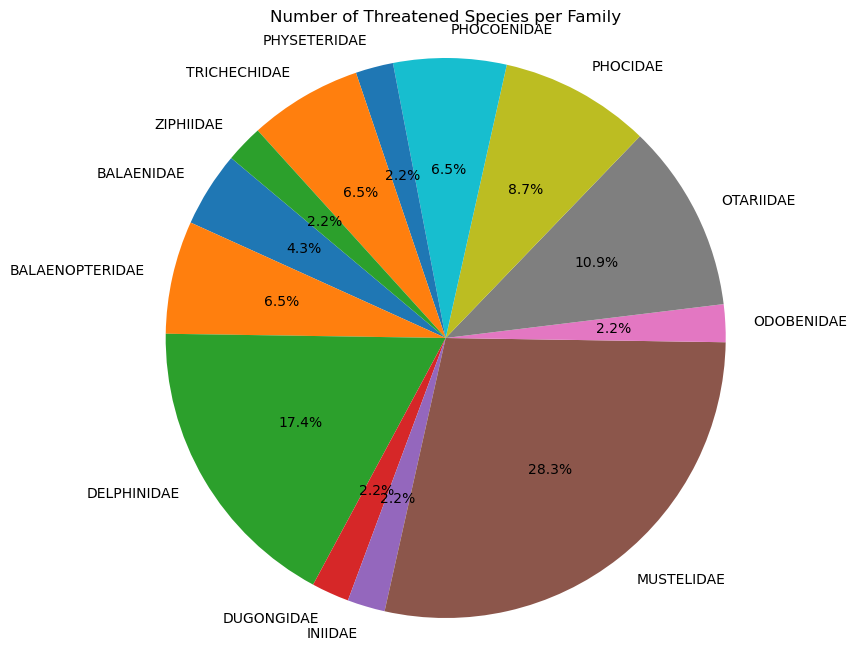

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
IUCNHeirarchyAndExtinction = pd.read_csv("/Users/eschuler/Downloads/IUCNHeirarchyAndExtinction.csv", encoding='ISO-8859-1')

# Filter for threatened species (CR, EN, VU)
threatened_species = IUCNHeirarchyAndExtinction[IUCNHeirarchyAndExtinction['category'].isin(['CR', 'EN', 'VU'])]

# Group by family and count occurrences
species_per_family = threatened_species.groupby('family').size()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(species_per_family, labels=species_per_family.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Threatened Species per Family')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




In [6]:
# Phase 3 Portion of IUCN Query and Visualizatoin (Option #1)

import pandas as pd

# Load the CSV file
IUCNHeirarchyAndExtinction = pd.read_csv("/Users/eschuler/Downloads/IUCNHeirarchyAndExtinction.csv", encoding='ISO-8859-1')

# Filter for threatened species (CR, EN, VU)
threatened_species2 = IUCNHeirarchyAndExtinction[IUCNHeirarchyAndExtinction['category'].isin(['CR', 'EN', 'VU'])]

# Group by family and count occurrences
species_per_family2 = threatened_species2.groupby('family').size()

# Convert the series to a DataFrame for better display and add a column name
species_per_family2_df = species_per_family2.reset_index(name='Count')

# Display the DataFrame
print(species_per_family2_df)


             family  Count
0        BALAENIDAE      2
1   BALAENOPTERIDAE      3
2       DELPHINIDAE      8
3        DUGONGIDAE      1
4           INIIDAE      1
5        MUSTELIDAE     13
6        ODOBENIDAE      1
7         OTARIIDAE      5
8          PHOCIDAE      4
9       PHOCOENIDAE      3
10     PHYSETERIDAE      1
11     TRICHECHIDAE      3
12        ZIPHIIDAE      1
